# Cross-Modality Association Network

## Typical Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('RF_Padded_File.csv')

In [3]:
df_2=df

In [11]:
df_2.drop(['Unnamed: 0'],axis=1,inplace=True)

## Scaling the Data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scalar=StandardScaler()

In [14]:
scalar.fit(df_2)

StandardScaler()

In [15]:
df_scale=scalar.transform(df_2)

In [16]:
df_scaled=pd.DataFrame(data=df_scale, columns=df_2.columns)

In [17]:
df_scaled

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,NR_HR,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
0,-0.997792,-0.191469,-0.036005,0.180731,-1.543868,0.008452,0.144274,0.066656,0.483268,-0.641146,...,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
1,-1.089952,-0.277958,-0.036005,0.180731,-1.543868,0.008452,0.144274,0.066656,0.483268,-0.666167,...,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
2,-0.576487,-0.450936,-0.036005,-0.168234,-1.026411,0.008452,0.144274,0.066656,0.483268,-0.739637,...,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
3,-0.477743,-0.450936,-0.036005,0.406234,-1.619943,0.008452,0.144274,0.066656,0.483268,-0.911539,...,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
4,-1.247942,-0.412496,-0.036005,0.180731,-1.543868,0.008452,0.144274,0.066656,0.483268,-0.773291,...,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243113,-0.681813,-0.454139,0.236952,-1.029708,-0.125706,1.137310,0.931778,0.066656,0.483268,0.442702,...,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243114,-0.497492,-1.017920,0.236952,-1.029708,-0.125706,1.137310,0.931778,0.066656,0.483268,0.651691,...,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243115,-0.694979,-1.080384,0.236952,-1.029708,-0.125706,1.137310,0.931778,0.066656,0.483268,0.338207,...,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243116,-1.109701,-0.724818,0.236952,-1.029708,-0.125706,1.137310,0.931778,0.066656,0.483268,0.860680,...,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883


In [18]:
from sklearn.preprocessing import FunctionTransformer

In [19]:
from sklearn.compose import ColumnTransformer

In [20]:
df_2.columns

Index(['Speed_MPH', 'ATP', 'BP_Hg', 'JF', 'FF', 'Src_Temperature',
       'Src_Pressure', 'Src_WindSpeed', 'Src_Weather_Info', 'NR_HR', 'Age',
       'Trait_Anxiety', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Openness', 'Gender_Female', 'Gender_Male', 'Weekday',
       'Weekend'],
      dtype='object')

In [21]:
# df_2=df_2.drop('Src_Weather_Info', axis=1)

In [22]:
log_transform = FunctionTransformer(lambda x: np.log(x))
ct = ColumnTransformer(transformers=[['log_transform',log_transform,list(range(len(df_scaled.columns)))]],remainder='passthrough')
log_X = ct.fit_transform(df_scaled).copy()
log_X = pd.DataFrame(log_X,columns=df_scaled.columns).copy()

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


## Building the Network

In [23]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def calculate_spearman(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues
def calculate_pearson(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [24]:
df_2=df_scaled

In [25]:
corr_matrix=df_2.corr().abs()
half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
df_2.drop(dropped_columns, axis=1, inplace=True)

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_10564/3278247437.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [26]:
calculate_spearman(df_2)

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Weekday
Speed_MPH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9721,0.0,0.0,0.0,0.0,0.077,0.0,0.0,0.0,0.0
ATP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0523,0.0
BP_Hg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0043,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0318,0.0,0.0,0.0,0.0822,0.0,0.0,0.0,0.0,0.0,0.0
Src_Pressure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_WindSpeed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1994,0.0
Src_Weather_Info,0.0,0.0,0.0,0.0,0.0,0.0318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NR_HR,0.9721,0.0,0.0,0.0,0.0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0


In [27]:
calculate_pearson(df_2)

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Weekday
Speed_MPH,0.0,0.0,0.0401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9344,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BP_Hg,0.0401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0431,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0015,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0009
Src_Temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1703,0.0,0.0,0.0,0.0,0.0,0.0
Src_Pressure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_WindSpeed,0.0,0.0,0.0,0.0,0.0015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Weather_Info,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NR_HR,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_2.corr()

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Weekday
Speed_MPH,1.000000,0.460353,-0.004163,-0.344154,0.490850,0.056035,0.064585,0.075122,-0.071949,-0.008437,-0.199010,0.000167,-0.169093,-0.356516,0.017941,-0.165746,0.348097,-0.178300,-0.061276
ATP,0.460353,1.000000,-0.043206,-0.136061,0.264896,0.078568,-0.075142,0.066194,-0.041343,-0.143575,-0.108261,0.053942,-0.073665,-0.162936,-0.131694,-0.021291,0.227002,0.041201,-0.039702
BP_Hg,-0.004163,-0.043206,1.000000,-0.041179,-0.010414,-0.115886,0.079689,-0.076816,0.035973,0.012121,0.084887,-0.050321,0.017988,-0.004102,0.074975,-0.040936,0.047585,0.053869,0.021742
JF,-0.344154,-0.136061,-0.041179,1.000000,-0.407268,-0.031431,-0.026022,-0.092901,0.064754,-0.092524,0.085923,0.046341,0.121945,0.234805,-0.010204,0.123315,-0.232116,0.176885,0.122627
FF,0.490850,0.264896,-0.010414,-0.407268,1.000000,-0.033741,0.058991,0.006422,-0.129987,0.007111,-0.185810,0.168405,-0.186454,-0.193563,0.047554,-0.072547,0.147159,-0.019134,0.006713
Src_Temperature,0.056035,0.078568,-0.115886,-0.031431,-0.033741,1.000000,-0.148317,0.265992,-0.019640,0.125946,-0.037797,-0.110618,-0.002781,-0.115452,-0.086298,-0.043066,0.155912,-0.134777,-0.045268
Src_Pressure,0.064585,-0.075142,0.079689,-0.026022,0.058991,-0.148317,1.000000,-0.342282,-0.126953,0.105674,0.294814,-0.429737,0.093030,-0.118923,0.012933,-0.379599,0.244761,-0.325074,0.020339
Src_WindSpeed,0.075122,0.066194,-0.076816,-0.092901,0.006422,0.265992,-0.342282,1.000000,0.160731,0.204779,-0.214832,0.121680,-0.034327,-0.042692,0.130772,0.104021,0.072768,-0.024854,0.102083
Src_Weather_Info,-0.071949,-0.041343,0.035973,0.064754,-0.129987,-0.019640,-0.126953,0.160731,1.000000,-0.081610,0.027701,-0.044948,0.153903,0.142462,0.202156,0.039822,-0.029981,0.047710,-0.120468
NR_HR,-0.008437,-0.143575,0.012121,-0.092524,0.007111,0.125946,0.105674,0.204779,-0.081610,1.000000,-0.159494,-0.194366,-0.089783,-0.242931,0.038956,-0.065044,0.116404,-0.331595,0.195200


In [29]:
import networkx as nx

In [30]:
from matplotlib.pyplot import figure

In [31]:
df_cols=pd.DataFrame()

In [32]:
df_2.columns

Index(['Speed_MPH', 'ATP', 'BP_Hg', 'JF', 'FF', 'Src_Temperature',
       'Src_Pressure', 'Src_WindSpeed', 'Src_Weather_Info', 'NR_HR', 'Age',
       'Trait_Anxiety', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Openness', 'Gender_Female', 'Weekday'],
      dtype='object')

In [33]:
df_cols['Weather']=['BP_Hg','Src_Temperature','Src_Pressure','Src_Windspeed','Src_Weather_Info_Clear','Src_Weather_Info_Clouds', 'Src_Weather_Info_Drizzle', 'Src_Weather_Info_Haze', 'Src_Weather_Info_Mist', 'Src_Weather_Info_Thunderstorm', 'Des_Weather_Info_Clear', 'Des_Weather_Info_Clouds', 'Des_Weather_Info_Haze', 'Des_Weather_Info_Mist', 'Des_Weather_Info_Thunderstorm' ]

In [34]:
df_psych=pd.DataFrame({'Psychometrics': ['Age','Trait_Anxiety','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Openness','Gender_Female','Gender_Male']})

In [35]:
df_cols = pd.concat([df_cols, df_psych], axis=1) 

In [36]:
df_cols

,Weather,Psychometrics
0,BP_Hg,Age
1,Src_Temperature,Trait_Anxiety
2,Src_Pressure,Extraversion
3,Src_Windspeed,Agreeableness
4,Src_Weather_Info_Clear,Conscientiousness
5,Src_Weather_Info_Clouds,Neuroticism
6,Src_Weather_Info_Drizzle,Openness
7,Src_Weather_Info_Haze,Gender_Female
8,Src_Weather_Info_Mist,Gender_Male
9,Src_Weather_Info_Thunderstorm,NaN


In [37]:
G=nx.Graph()

In [38]:
pvals=calculate_spearman(df_2)

In [39]:
# pvals.rename(columns = {'Src_Weather_Info_Thunderstorm':'Src_Thunderstorm'}, inplace = True)

In [40]:
# pvals.rename(columns = {'Day_Day1':'Day1', 'Day_Day2':'Day2', 'Day_Day3':'Day3', 'Day_Day4':'Day4',}, inplace = True)

In [41]:
# pvals.rename(columns = {'Day_Day5':'Day5', 'Day_Day6':'Day6', 'Day_Day7':'Day7'}, inplace = True)

In [42]:
# pvals.rename(columns = {'Src_Weather_Info':'Weather', 'Src_Temperature':'Temperature', 'NR_HR':'Heart_Rate'}, inplace = True)

In [43]:
# pvals.rename(columns = {'JF':'Jam_Factor'}, inplace = True)

In [44]:
# pvals.rename(columns = {'FF':'Free_Flow'}, inplace = True)

In [45]:
columns=pvals.columns

In [46]:
columns

Index(['Speed_MPH', 'ATP', 'BP_Hg', 'JF', 'FF', 'Src_Temperature',
       'Src_Pressure', 'Src_WindSpeed', 'Src_Weather_Info', 'NR_HR', 'Age',
       'Trait_Anxiety', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Openness', 'Gender_Female', 'Weekday'],
      dtype='object')

In [47]:
nonzeros={}
nonzeros['Indexes']=[]
nonzeros['Elements']=[]
nonzeros['Columns']=[]
for index, col in pvals.iteritems():
    counter=0
    arr=col.values
    for elem in arr:
        if elem>0:
            nonzeros['Indexes'].append(index)
            nonzeros['Elements'].append(elem)
            nonzeros['Columns'].append(columns[counter])
        counter+=1

In [48]:
df_map=pd.DataFrame()

In [49]:
df_map['Source']=nonzeros['Indexes']

In [50]:
df_map['Destination']=nonzeros['Columns']

In [51]:
df_map['Weights']=-np.log(nonzeros['Elements'])

In [52]:
df_map

,Source,Destination,Weights
0,Speed_MPH,NR_HR,0.028297
1,Speed_MPH,Conscientiousness,2.563950
2,ATP,Gender_Female,2.950759
3,BP_Hg,Agreeableness,5.449140
4,FF,NR_HR,5.546779
5,Src_Temperature,Src_Weather_Info,3.448289
6,Src_Temperature,Extraversion,2.498600
7,Src_WindSpeed,Gender_Female,1.612442
8,Src_Weather_Info,Src_Temperature,3.448289
9,NR_HR,Speed_MPH,0.028297


In [53]:
G = nx.from_pandas_edgelist(df_map, source='Source', target='Destination',
                            edge_attr='Weights')

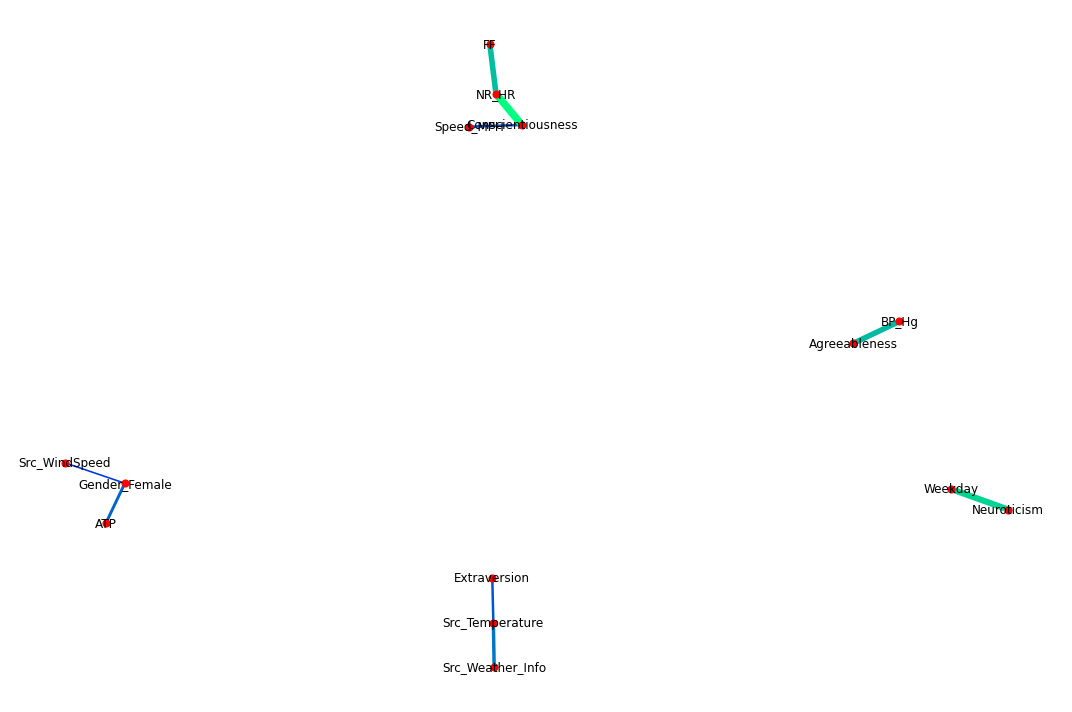

In [54]:
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors = range(172)

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='r')

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

## Community Detection

In [55]:
import networkx.algorithms.community as nx_com

In [56]:
from community import community_louvain

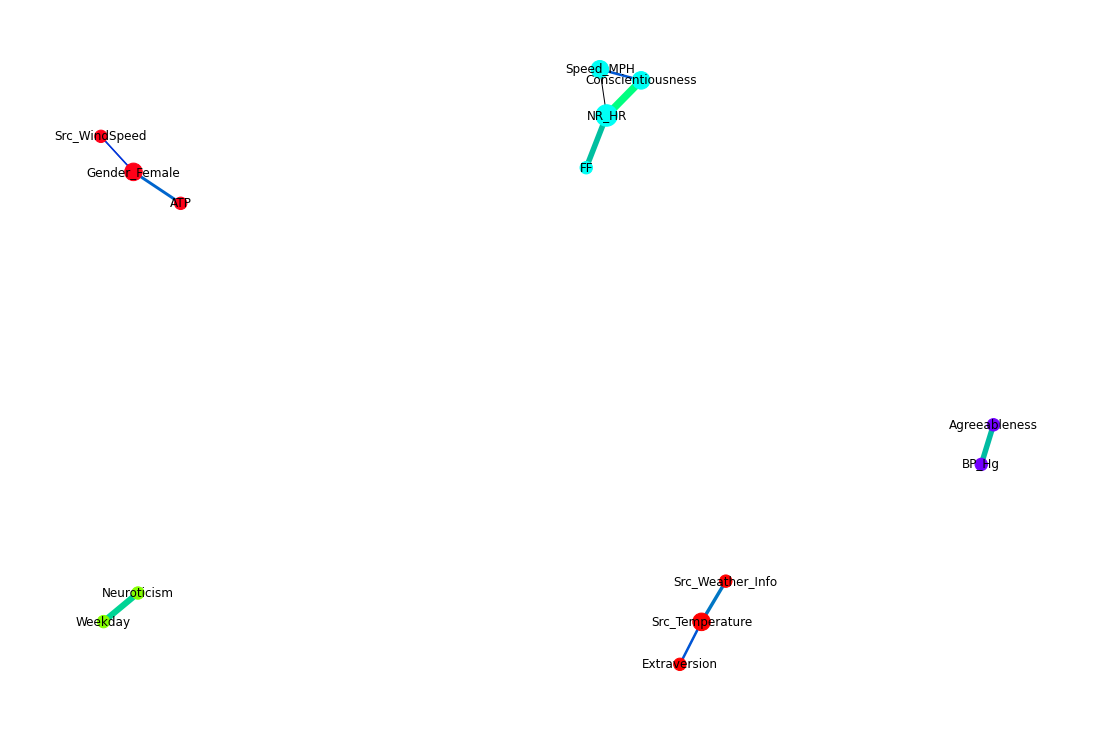

In [57]:
deg_centrality = nx.degree_centrality(G)
centrality = np.fromiter(deg_centrality.values(), float)

plt.figure(figsize=(15,10))

label = community_louvain.best_partition(G)
mod = community_louvain.modularity(label, G)
values = [label.get(node) for node in G.nodes()]


pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=values, node_size=centrality*2e3, cmap=plt.cm.hsv)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", )
plt.show()

## Building a Consensus Network

Notice that running the Louvain detection algorithm multiple times yields different communities. To get a general consensus, we can run that algorithm 1000 times, tabulate how often different features are paired to each other, and build communities. 

In [58]:
nodes=list(G.nodes())

In [59]:
prevalences={}
for i in range(len(values)-1):
    for j in range(i+1, len(values)):
        prevalences[(nodes[i],nodes[j])]=0

In [60]:
for i in range(1000):
    deg_centrality = nx.degree_centrality(G)
    centrality = np.fromiter(deg_centrality.values(), float)
    label = community_louvain.best_partition(G)
    mod = community_louvain.modularity(label, G)
    values = [label.get(node) for node in G.nodes()]
    for j in range(len(values)-1):
        for k in range(j+1, len(values)):
            if values[j]==values[k]:
                prevalences[(nodes[j],nodes[k])]+=1
        

In [61]:
prevalences

{('Speed_MPH', 'NR_HR'): 1000,
 ('Speed_MPH', 'Conscientiousness'): 1000,
 ('Speed_MPH', 'ATP'): 0,
 ('Speed_MPH', 'Gender_Female'): 0,
 ('Speed_MPH', 'BP_Hg'): 0,
 ('Speed_MPH', 'Agreeableness'): 0,
 ('Speed_MPH', 'FF'): 1000,
 ('Speed_MPH', 'Src_Temperature'): 0,
 ('Speed_MPH', 'Src_Weather_Info'): 0,
 ('Speed_MPH', 'Extraversion'): 0,
 ('Speed_MPH', 'Src_WindSpeed'): 0,
 ('Speed_MPH', 'Neuroticism'): 0,
 ('Speed_MPH', 'Weekday'): 0,
 ('NR_HR', 'Conscientiousness'): 1000,
 ('NR_HR', 'ATP'): 0,
 ('NR_HR', 'Gender_Female'): 0,
 ('NR_HR', 'BP_Hg'): 0,
 ('NR_HR', 'Agreeableness'): 0,
 ('NR_HR', 'FF'): 1000,
 ('NR_HR', 'Src_Temperature'): 0,
 ('NR_HR', 'Src_Weather_Info'): 0,
 ('NR_HR', 'Extraversion'): 0,
 ('NR_HR', 'Src_WindSpeed'): 0,
 ('NR_HR', 'Neuroticism'): 0,
 ('NR_HR', 'Weekday'): 0,
 ('Conscientiousness', 'ATP'): 0,
 ('Conscientiousness', 'Gender_Female'): 0,
 ('Conscientiousness', 'BP_Hg'): 0,
 ('Conscientiousness', 'Agreeableness'): 0,
 ('Conscientiousness', 'FF'): 1000,
 ('Co

In [62]:
consen={}
for node in nodes:
    consen[node]=[]
for key in prevalences.keys():
    consen[key[0]].append((key[1],prevalences[key]))
    #consen[key[1]].append((key[0],prevalences[key]))

In [63]:
pairs=[]
for key in consen.keys():
    for elem in consen[key]:
        if elem[1]>500:
            pairs.append((key, elem[0]))

In [64]:
pairs

[('Speed_MPH', 'NR_HR'),
 ('Speed_MPH', 'Conscientiousness'),
 ('Speed_MPH', 'FF'),
 ('NR_HR', 'Conscientiousness'),
 ('NR_HR', 'FF'),
 ('Conscientiousness', 'FF'),
 ('ATP', 'Gender_Female'),
 ('ATP', 'Src_WindSpeed'),
 ('Gender_Female', 'Src_WindSpeed'),
 ('BP_Hg', 'Agreeableness'),
 ('Src_Temperature', 'Src_Weather_Info'),
 ('Src_Temperature', 'Extraversion'),
 ('Src_Weather_Info', 'Extraversion'),
 ('Neuroticism', 'Weekday')]

In [65]:
vals={}
for i in range(len(nodes)):
    vals[nodes[i]]=i

In [66]:
for i in range(len(pairs)):
    vals[pairs[i][1]]=vals[pairs[i][0]]

In [67]:
vals

{'Speed_MPH': 0,
 'NR_HR': 0,
 'Conscientiousness': 0,
 'ATP': 3,
 'Gender_Female': 3,
 'BP_Hg': 5,
 'Agreeableness': 5,
 'FF': 0,
 'Src_Temperature': 8,
 'Src_Weather_Info': 8,
 'Extraversion': 8,
 'Src_WindSpeed': 3,
 'Neuroticism': 12,
 'Weekday': 12}

In [68]:
values=[]
for i in range(len(nodes)):
    values.append(0)

In [69]:
for key in vals.keys():
    values[nodes.index(key)]=vals[key]

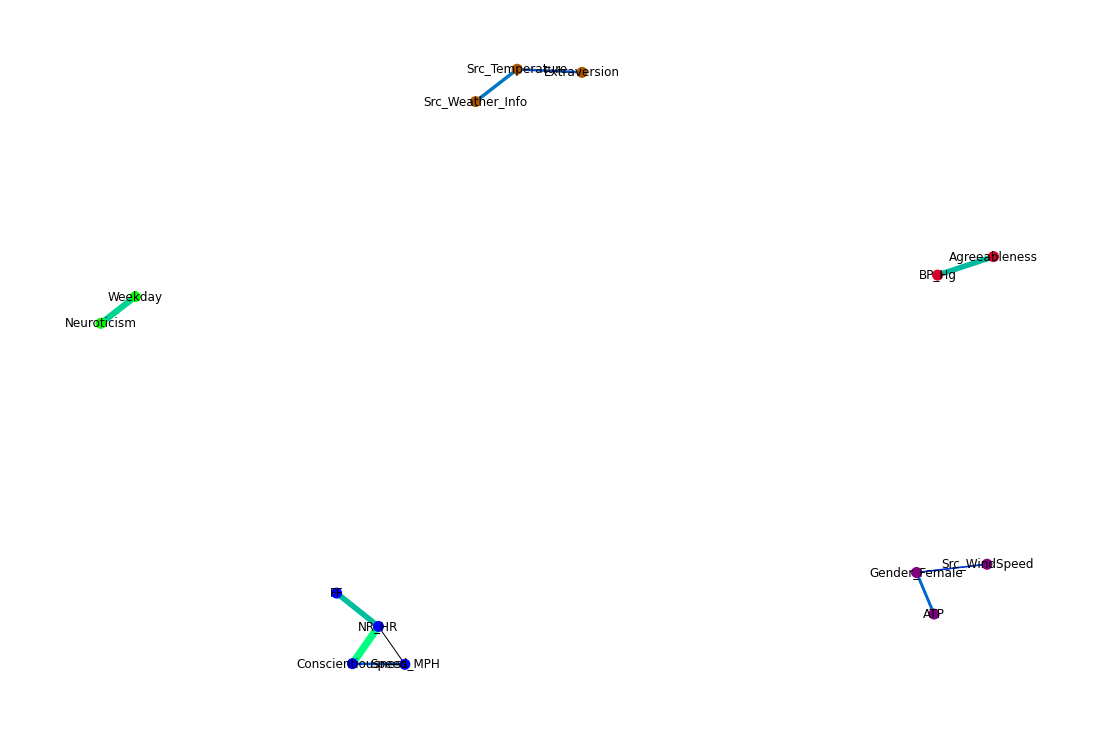

In [70]:
deg_centrality = nx.degree_centrality(G)
centrality = np.fromiter(deg_centrality.values(), float)

plt.figure(figsize=(15,10))

# label = community_louvain.best_partition(G)
# mod = community_louvain.modularity(label, G)
# values = [label.get(node) for node in G.nodes()]


pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=values, node_size=100, cmap=plt.cm.brg)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
plt.show()

## Building the Markov Network

In [71]:
centrality=nx.eigenvector_centrality(G, weight=widths.any())

In [72]:
sorted((f"{c:0.2f}", v) for v, c in centrality.items())

[('0.00', 'ATP'),
 ('0.00', 'Agreeableness'),
 ('0.00', 'BP_Hg'),
 ('0.00', 'Extraversion'),
 ('0.00', 'Gender_Female'),
 ('0.00', 'Neuroticism'),
 ('0.00', 'Src_Temperature'),
 ('0.00', 'Src_Weather_Info'),
 ('0.00', 'Src_WindSpeed'),
 ('0.00', 'Weekday'),
 ('0.28', 'FF'),
 ('0.52', 'Conscientiousness'),
 ('0.52', 'Speed_MPH'),
 ('0.61', 'NR_HR')]

In [73]:
from sklearn.covariance import GraphicalLasso

In [74]:
gl=GraphicalLasso()

In [75]:
fit=gl.fit(df_2.values)

In [76]:
fit

GraphicalLasso()

In [77]:
np.around(fit.covariance_, decimals=3)

array([[ 1.   ,  0.45 , -0.002, -0.334,  0.481,  0.046,  0.055,  0.065,
        -0.062,  0.002, -0.203,  0.009, -0.179, -0.347,  0.008, -0.158,
         0.338, -0.168, -0.051],
       [ 0.45 ,  1.   , -0.033, -0.146,  0.255,  0.069, -0.065,  0.056,
        -0.035, -0.134, -0.098,  0.047, -0.084, -0.173, -0.122, -0.011,
         0.217,  0.031, -0.03 ],
       [-0.002, -0.033,  1.   , -0.031, -0.   , -0.106,  0.07 , -0.067,
         0.026,  0.002,  0.075, -0.04 ,  0.02 ,  0.006,  0.065, -0.031,
         0.038,  0.044,  0.012],
       [-0.334, -0.146, -0.031,  1.   , -0.397, -0.041, -0.036, -0.083,
         0.055, -0.083,  0.096,  0.048,  0.112,  0.225, -0.   ,  0.133,
        -0.222,  0.167,  0.113],
       [ 0.481,  0.255, -0.   , -0.397,  1.   , -0.024,  0.049,  0.016,
        -0.12 , -0.003, -0.189,  0.158, -0.196, -0.196,  0.038, -0.063,
         0.144, -0.029, -0.003],
       [ 0.046,  0.069, -0.106, -0.041, -0.024,  1.   , -0.138,  0.256,
        -0.01 ,  0.116, -0.045, -0.101, -0.

In [78]:
inv_cov=pd.DataFrame(data=fit.covariance_,columns=df_2.columns)

In [79]:
len(df_2.columns)

19

In [80]:
index={}
for i in range(19):
    index[i]=df_2.columns[i]
inv_cov.rename(index=index, inplace=True)

In [81]:
inv_cov

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Weekday
Speed_MPH,1.000000,0.450352,-0.001537,-0.334149,0.480850,0.046038,0.054585,0.065118,-0.061950,0.001565,-0.202595,0.009374,-0.179085,-0.346510,0.007939,-0.158435,0.338098,-0.168296,-0.051278
ATP,0.450352,1.000000,-0.033203,-0.146055,0.254896,0.068570,-0.065140,0.056194,-0.035447,-0.133575,-0.098260,0.047220,-0.083658,-0.172932,-0.121698,-0.011282,0.217003,0.031202,-0.029703
BP_Hg,-0.001537,-0.033203,1.000000,-0.031181,-0.000413,-0.105887,0.069688,-0.066817,0.025973,0.002121,0.074882,-0.040320,0.019719,0.005901,0.064975,-0.030940,0.037585,0.043870,0.011741
JF,-0.334149,-0.146055,-0.031181,1.000000,-0.397268,-0.041433,-0.036023,-0.082899,0.054755,-0.082527,0.095925,0.047587,0.111939,0.224797,-0.000201,0.133310,-0.222117,0.166881,0.112628
FF,0.480850,0.254896,-0.000413,-0.397268,1.000000,-0.023741,0.048987,0.016422,-0.119987,-0.002891,-0.189134,0.158395,-0.196453,-0.195678,0.037555,-0.062544,0.143770,-0.029123,-0.003287
Src_Temperature,0.046038,0.068570,-0.105887,-0.041433,-0.023741,1.000000,-0.138316,0.255990,-0.009641,0.115949,-0.045245,-0.100611,-0.012770,-0.125447,-0.076301,-0.053062,0.145919,-0.124785,-0.035267
Src_Pressure,0.054585,-0.065140,0.069688,-0.036023,0.048987,-0.138316,1.000000,-0.332290,-0.116954,0.095680,0.284810,-0.430769,0.103047,-0.108905,0.002930,-0.369612,0.234778,-0.315086,0.013655
Src_WindSpeed,0.065118,0.056194,-0.066817,-0.082899,0.016422,0.255990,-0.332290,1.000000,0.150731,0.194781,-0.206961,0.111675,-0.040747,-0.052697,0.120772,0.094026,0.062763,-0.014848,0.092084
Src_Weather_Info,-0.061950,-0.035447,0.025973,0.054755,-0.119987,-0.009641,-0.116954,0.150731,1.000000,-0.071608,0.035287,-0.034943,0.159823,0.132463,0.192154,0.029821,-0.035505,0.045380,-0.110469
NR_HR,0.001565,-0.133575,0.002121,-0.082527,-0.002891,0.115949,0.095680,0.194781,-0.071608,1.000000,-0.149491,-0.184371,-0.079781,-0.232933,0.028955,-0.075052,0.126413,-0.321591,0.185197


In [82]:
data=inv_cov.columns

In [83]:
data

Index(['Speed_MPH', 'ATP', 'BP_Hg', 'JF', 'FF', 'Src_Temperature',
       'Src_Pressure', 'Src_WindSpeed', 'Src_Weather_Info', 'NR_HR', 'Age',
       'Trait_Anxiety', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Openness', 'Gender_Female', 'Weekday'],
      dtype='object')

In [84]:
nonzero={}
nonzero['Indexes']=[]
nonzero['Elements']=[]
nonzero['Columns']=[]
for index, col in inv_cov.iteritems():
    counter=0
    arr=col.values
    for elem in arr:
        if np.absolute(elem-1)>0.000001:
            nonzero['Indexes'].append(index)
            nonzero['Elements'].append(elem*2)
            nonzero['Columns'].append(columns[counter])
        counter+=1

In [85]:
df_map2=pd.DataFrame()

In [86]:
df_map2['Source']=nonzero['Indexes']

In [87]:
df_map2['Destination']=nonzero['Columns']
df_map2['Weights']=nonzero['Elements']

In [88]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

<Figure size 1080x720 with 0 Axes>

In [89]:
pos

{'Speed_MPH': array([-0.94151047,  0.2916606 ]),
 'ATP': array([ 0.35241509, -0.24135929]),
 'BP_Hg': array([0.93496006, 0.46172859]),
 'JF': array([-0.04154845, -1.        ]),
 'FF': array([-0.48921423, -0.82070969]),
 'Src_Temperature': array([-0.05604824,  0.63394543]),
 'Src_Pressure': array([-0.98114208, -0.18959728]),
 'Src_WindSpeed': array([0.21208778, 0.9893403 ]),
 'Src_Weather_Info': array([-0.47845447,  0.01105051]),
 'NR_HR': array([ 0.74434994, -0.58366233]),
 'Age': array([0.5149386 , 0.66270215]),
 'Trait_Anxiety': array([-0.63890747,  0.56775201]),
 'Extraversion': array([-0.08306925, -0.51392922]),
 'Agreeableness': array([0.00536818, 0.16594954]),
 'Conscientiousness': array([ 0.39035511, -0.84419284]),
 'Neuroticism': array([-0.6817105 , -0.47000867]),
 'Openness': array([ 0.96802758, -0.17476733]),
 'Gender_Female': array([-0.38809269,  0.89680492]),
 'Weekday': array([0.6571955, 0.1572926])}

In [90]:
modalities={'Speed_MPH':0,'ATP':0,'BP_Hg':1,'Src_Weather_Info':1,'Des_Weather_Info':1,'Src_Pressure':1,
            'Src_Temperature':1,'Src_WindSpeed':1,'Age':2,'Trait_Anxiety':2,'Extraversion':2,'Agreeableness':2,
           'Neuroticism':2,'Gender_Female':2,'Weekday':3,'NR_HR':4,'Conscientiousness':2,'FF':5,'JF':5,'Openness':2}

In [91]:
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [92]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

In [93]:
nodelist

['Speed_MPH',
 'ATP',
 'BP_Hg',
 'JF',
 'FF',
 'Src_Temperature',
 'Src_Pressure',
 'Src_WindSpeed',
 'Src_Weather_Info',
 'NR_HR',
 'Age',
 'Trait_Anxiety',
 'Extraversion',
 'Agreeableness',
 'Conscientiousness',
 'Neuroticism',
 'Openness',
 'Gender_Female',
 'Weekday']

In [94]:
vals2

[0, 0, 1, 5, 5, 1, 1, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3]

First, the graph with all edges

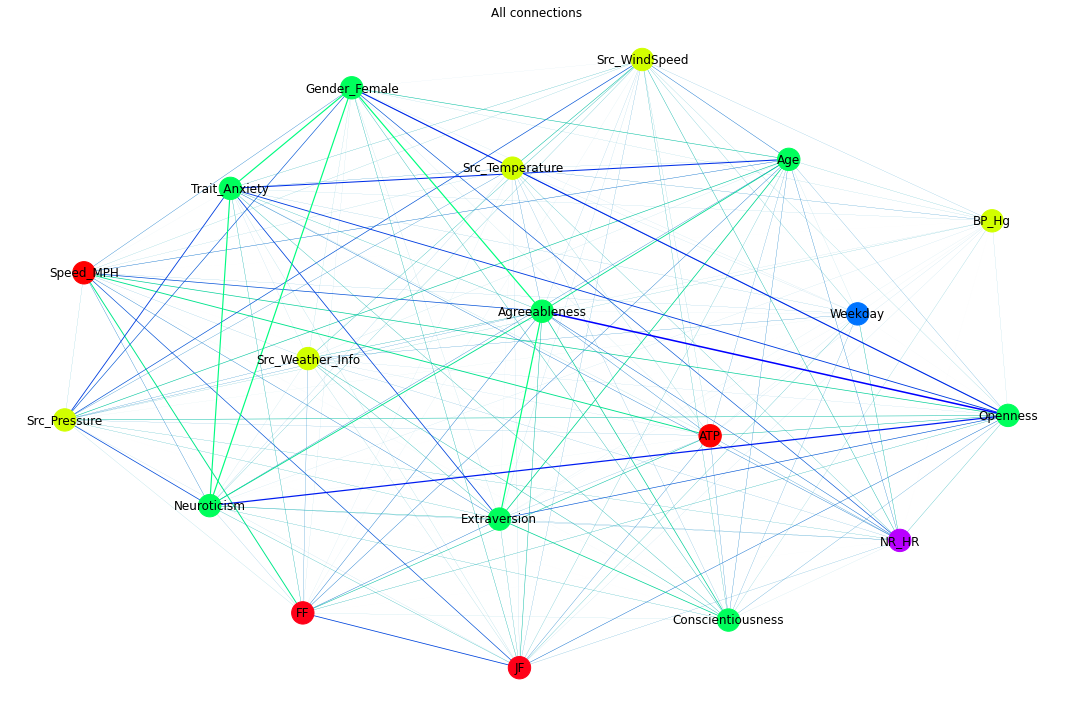

In [95]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=500,nodelist=nodelist, node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.hsv)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("All connections")
plt.tight_layout()

In [96]:
df_pos=df_map2[df_map2['Weights']>0]
df_neg=df_map2[df_map2['Weights']<0]

Next, the graph with edges that only show positive correlations

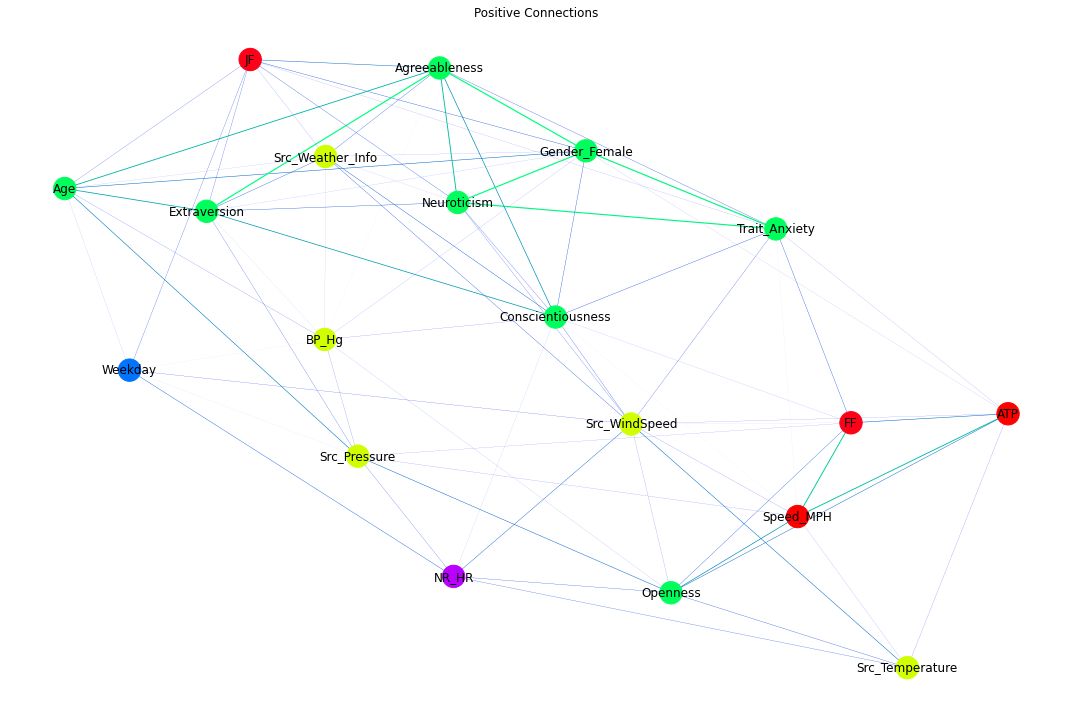

In [97]:
G = nx.from_pandas_edgelist(df_pos, source='Source', target='Destination',
                            edge_attr='Weights') 
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=500, nodelist=nodelist, node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.hsv)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Positive Connections")
plt.tight_layout()

Next, the graph with edges that show negative correlations

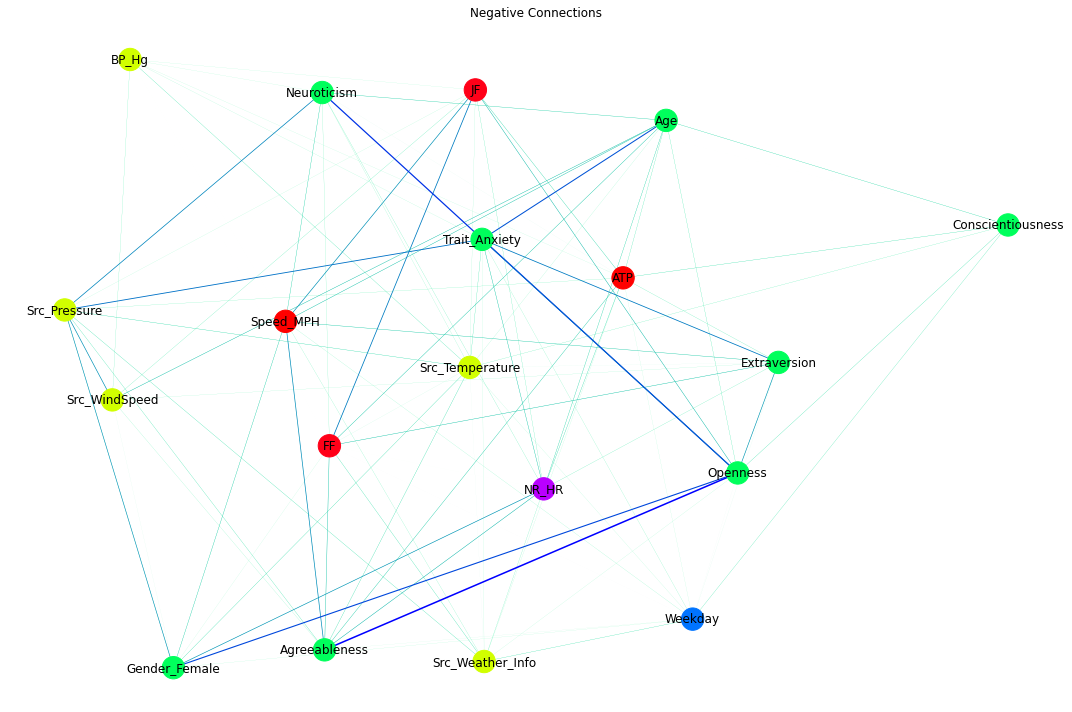

In [98]:
G = nx.from_pandas_edgelist(df_neg, source='Source', target='Destination',
                            edge_attr='Weights')
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=500, nodelist=nodelist, node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.hsv)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Negative Connections")
plt.tight_layout()

In [99]:
df_sig=df_map2[np.absolute(df_map2['Weights'])>0.05]

Now, a graph with edges that represent significant correlations (determined by an arbitrary metric of choice)

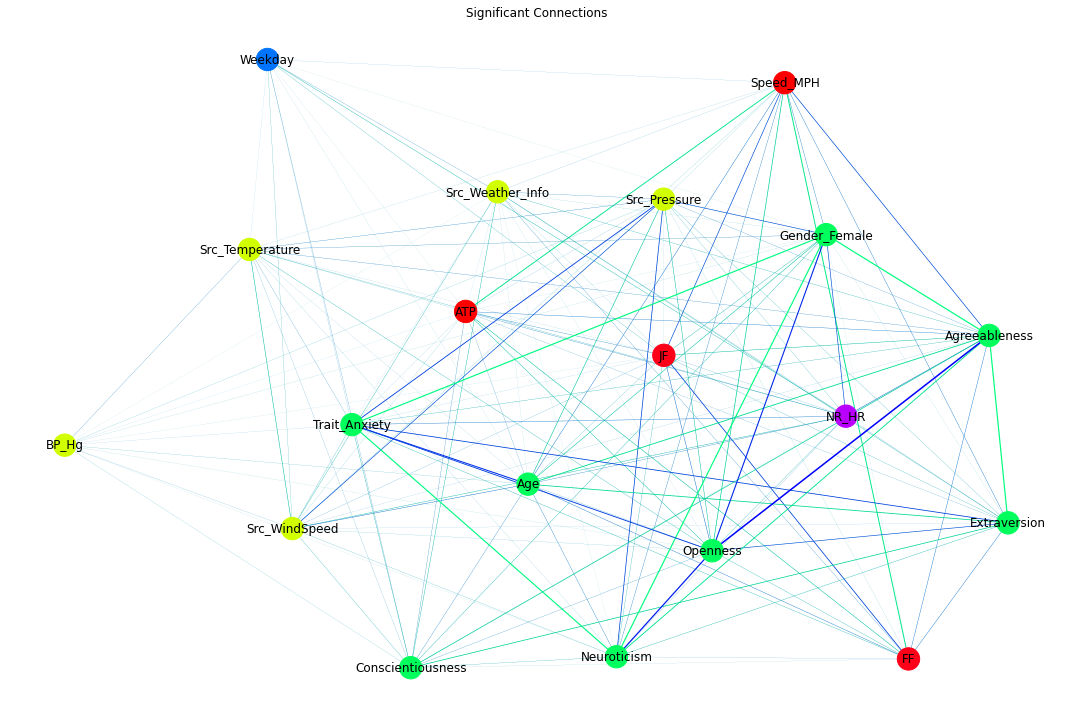

In [100]:
G = nx.from_pandas_edgelist(df_sig, source='Source', target='Destination',
                            edge_attr='Weights')
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=500, nodelist=nodelist, node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.hsv)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Significant Connections")
plt.tight_layout()

In [101]:
df_map2

,Source,Destination,Weights
0,Speed_MPH,ATP,0.900705
1,Speed_MPH,BP_Hg,-0.003074
2,Speed_MPH,JF,-0.668298
3,Speed_MPH,FF,0.961700
4,Speed_MPH,Src_Temperature,0.092076
...,...,...,...
337,Weekday,Agreeableness,-0.037665
338,Weekday,Conscientiousness,-0.194518
339,Weekday,Neuroticism,0.001306
340,Weekday,Openness,-0.012824


In [102]:
temp=list(df_map2.values)
removed=[]
for i in range(len(df_map2.values)):
    if vals3[df_map2.values[i][0]]==vals3[df_map2.values[i][1]]:
        removed.append('Yes')
    else:
        removed.append('No')

In [103]:
df_map2['Remove?']=removed

In [104]:
df_removed=df_map2[df_map2['Remove?']=='No']

Now for the graph that has edges between different modalities 

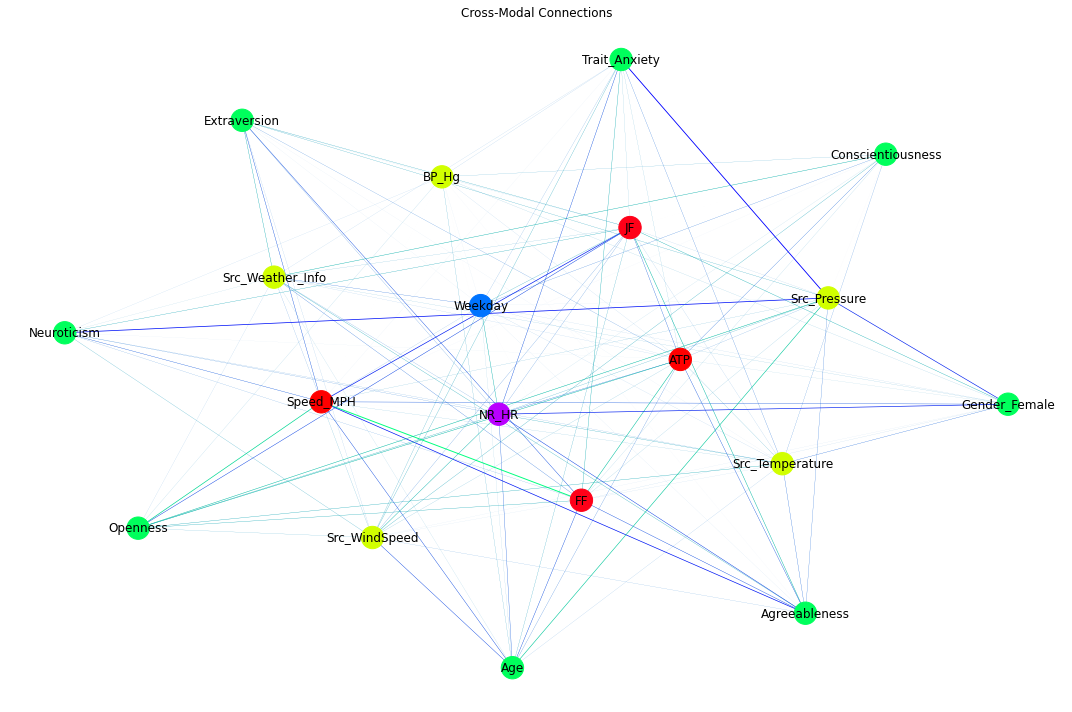

In [105]:
G = nx.from_pandas_edgelist(df_removed, source='Source', target='Destination',
                            edge_attr='Weights')
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=500, nodelist=nodelist, node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.hsv)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Cross-Modal Connections")
plt.tight_layout()